In [5]:
#PM – is the prostate mask, T2 and ADC are the MRI sequences

In [6]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import cv2

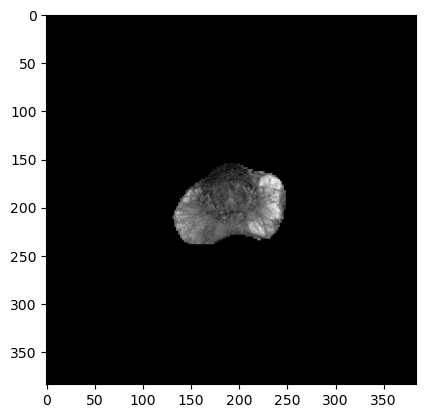

In [7]:
# Load an image and segmentation into Python.
image = sitk.ReadImage('./nifti/ProstateX-0000/T2W.nii')
segmentation = sitk.ReadImage('./nifti/ProstateX-0000/PM.nii')

# Assignment: Part A)  Overlay the segmented mask onto image so as to display only the region of interest. Print these images.
image_array = sitk.GetArrayFromImage(image)
segmentation_array = sitk.GetArrayFromImage(segmentation)
 
 
region_of_interest = []
for i in range(0, image_array.shape[0]):
    overlay = np.where(segmentation_array[i]>0, image_array[i], 0)
    region_of_interest.append(overlay)


plt.imshow(region_of_interest[len(region_of_interest)//2], cmap='gray') # middle slice

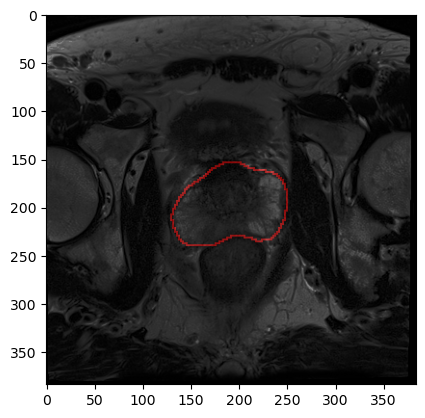

In [8]:


mask_outline = np.zeros(segmentation_array.shape, dtype=np.uint8)
for i in range(0, mask_outline.shape[0]):
    mask_outline[i] = cv2.dilate(segmentation_array[i], np.ones((5, 5), dtype=np.uint8), iterations=1) - segmentation_array[i]

original_image = np.array(image_array[len(region_of_interest)//2], dtype=float) 
original_image /= original_image.max()

mask_outline_color = np.zeros((original_image.shape[0], original_image.shape[1], 3), dtype=float)
mask_outline_color[mask_outline[len(region_of_interest)//2] > 0] = [1, 0, 0]

plt.imshow(original_image, cmap='gray', vmin=0, vmax=1)
plt.imshow(mask_outline_color, alpha=0.5)
plt.savefig("overlay.png", bbox_inches='tight', pad_inches=0)